# Лабораторная Работа №1

## Селиванов Алексей 16-В-1 

## Вариант 1

### Титаник

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.rcParams.update({'font.size':12,'figure.figsize':[13,8]})

In [24]:
df = pd.read_csv("/home/alexey/Studying_linux/TDDP/Lab1/!data/1_titanic/titanic/train.csv")#, index_col = "PassengerId")

#### 1. Определите количество мужчин и женщин, которые ехали на корабле.

In [26]:
#print(df[df['Sex']=='female']['Sex'].count(),"female were on the ship")
#print(df[df['Sex']=='male']['Sex'].count(),"male were on the ship")
# или
print(df.groupby('Sex')['Sex'].count())

Sex
female    314
male      577
Name: Sex, dtype: int64


#### 2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров. 

In [27]:
#print(df[df['Survived']!=0]['Survived'].count(),"people survived")
print(df.groupby('Survived')['Survived'].count())
print("\nThere are {:.1f}% of all passengers".format(df[df['Survived']!=0]['Survived'].count()/df['Name'].count()*100))

Survived
0    549
1    342
Name: Survived, dtype: int64

There are 38.4% of all passengers


#### 3. Какую долю пассажиры первого класса составляли среди всех пассажиров?

In [28]:
print("First class passengers were {:.1f}% of all passengers".format(df[df['Pclass']==1]['Pclass'].count()/df['Name'].count()*100))

First class passengers were 24.2% of all passengers


#### 4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 

In [29]:
print("Average age of passengers is",df['Age'].mean())
print("Median of the age of passengers is",df['Age'].median())

Average age of passengers is 29.69911764705882
Median of the age of passengers is 28.0


#### 5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.

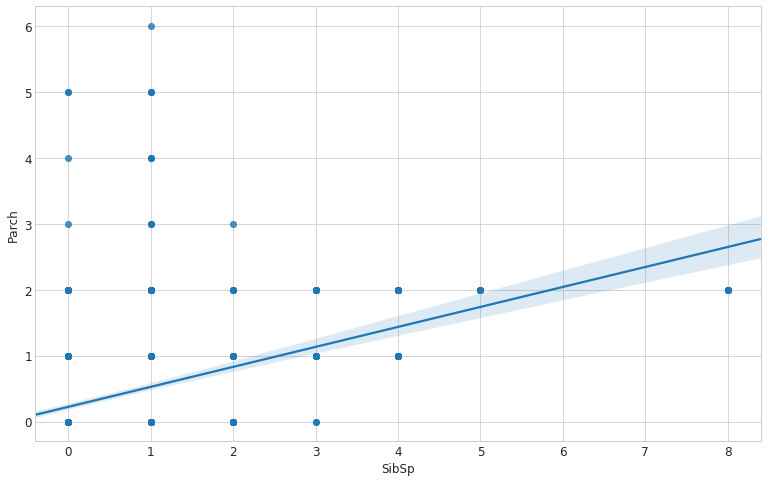

In [30]:
sns.regplot(x='SibSp',y='Parch',data = df)
plt.show()

In [31]:
corr, pval = pearsonr(df['SibSp'],df['Parch'])
print("Pearson correlation for 'SibSp' and 'Parch' is: {0}\nP-value is: {1}".format(corr,pval))

Pearson correlation for 'SibSp' and 'Parch' is: 0.4148376986201561
P-value is: 2.2418236681398336e-38


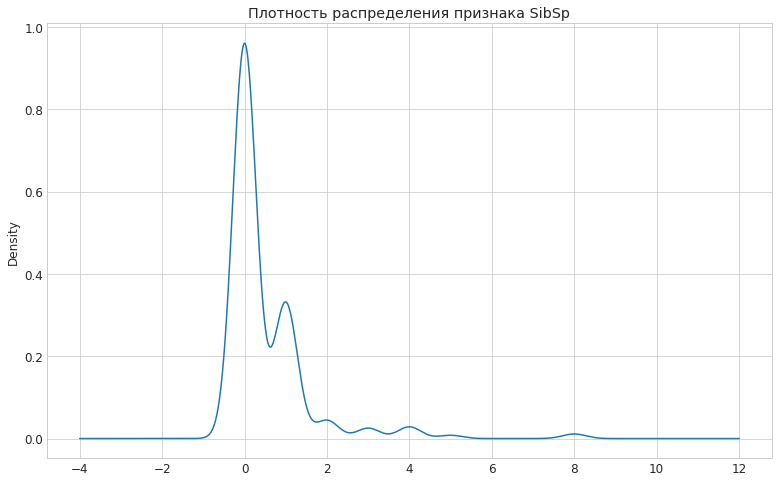

In [32]:
df['SibSp'].plot.kde()
plt.title("Плотность распределения признака SibSp")
plt.show()

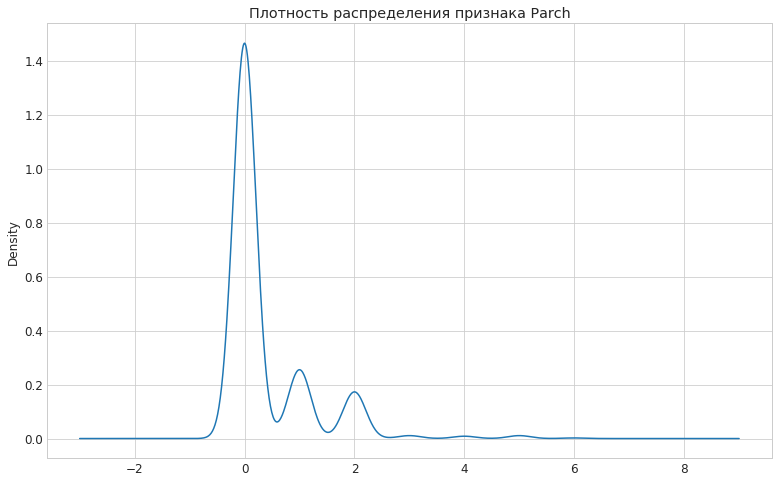

In [33]:
df['Parch'].plot.kde()
plt.title("Плотность распределения признака Parch")
plt.show()

#### 6.Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.

In [34]:
names_list=[]
for fullname in df['Name'][df['Sex']=='female']:
    for string in fullname.split():
        if '(' in fullname:
            if '(' in string and not 'Mrs' in string:
                if ')' in string:
                    string = string[:len(string)-1]
                name = string[1:]
                break
        elif '.' in string:
            name = fullname.split()[fullname.split().index(string)+1]
            break                                      # получили имя
    names_list.append(name)   
names = pd.Series(names_list)
print("The most famous female name on the ship is:",names.value_counts().index[0])
print("Number of its' repeats:", names.value_counts()[0])

The most famous female name on the ship is: Anna
Number of its' repeats: 15


#### 7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

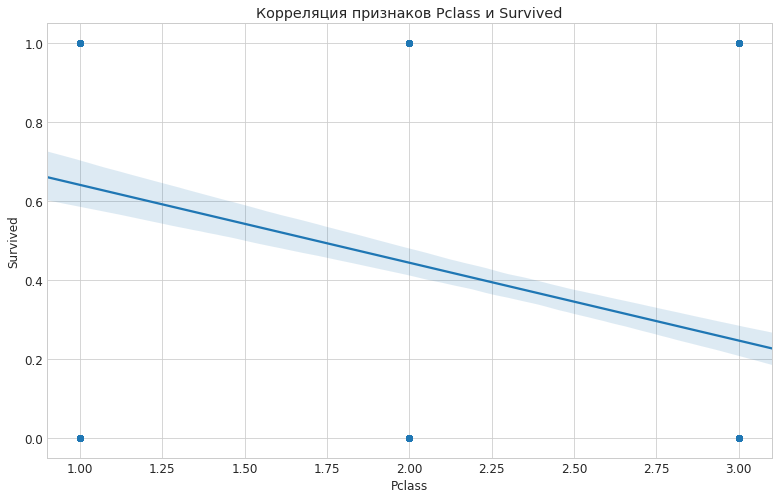

In [35]:
sns.regplot('Pclass','Survived',data=df)
plt.title("Корреляция признаков Pclass и Survived")
plt.show()

In [36]:
df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

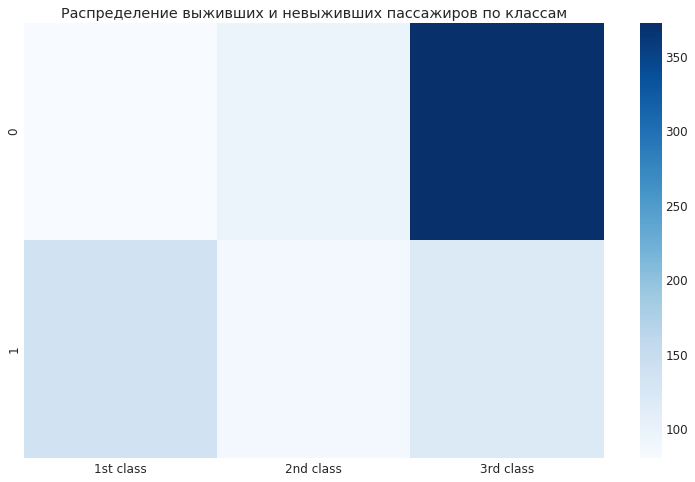

In [37]:
subdf=pd.DataFrame({
                    '1st class':list(df.groupby(['Pclass','Survived'])['Survived'].count())[0:2],
                    '2nd class':list(df.groupby(['Pclass','Survived'])['Survived'].count())[2:4],
                    '3rd class':list(df.groupby(['Pclass','Survived'])['Survived'].count())[4:6]},)
sns.heatmap(subdf,cmap='Blues')
plt.title("Распределение выживших и невыживших пассажиров по классам")
plt.show()

######  По тепловой карте выше мы видим, что количество погибших пассажиров растет с понижением уровня комфорта (повышением уровня класса). Следовательно, можно предположить что класс пассажира коррелирует с выживаемостью

In [38]:
corr, pval = pearsonr(df['Pclass'],df['Survived'])
print("Pearson correlation for 'Pclass' and 'Survived' is: {0}\nP-value is: {1}".format(corr,pval))

Pearson correlation for 'Pclass' and 'Survived' is: -0.33848103596101536
P-value is: 2.53704738798042e-25


##### Поскольку p-уровень значимости очень мал, то можно считать что наша полученная отрицательная зависимоть не случайна

#### 8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

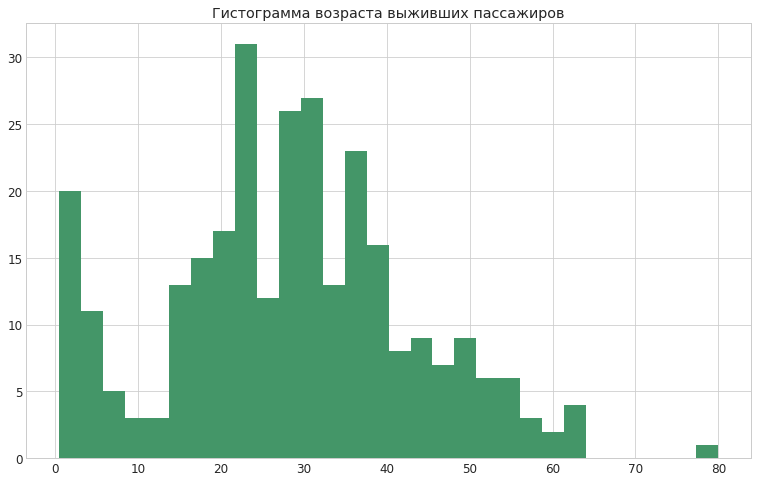

In [95]:
df[df['Survived']!=0].Age.hist(bins=30, color='#449668')
plt.title("Гистограмма возраста выживших пассажиров")
plt.show()

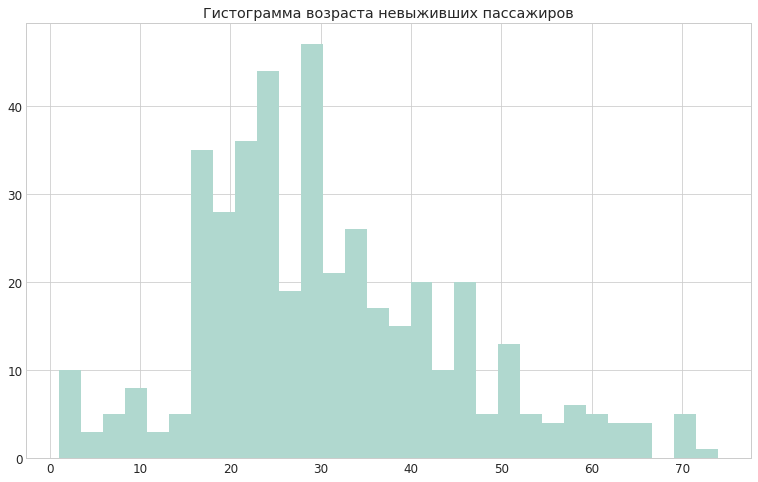

In [94]:
df[df['Survived']==0].Age.hist(bins=30,color='#B0D8CF')
plt.title("Гистограмма возраста невыживших пассажиров")
plt.show()

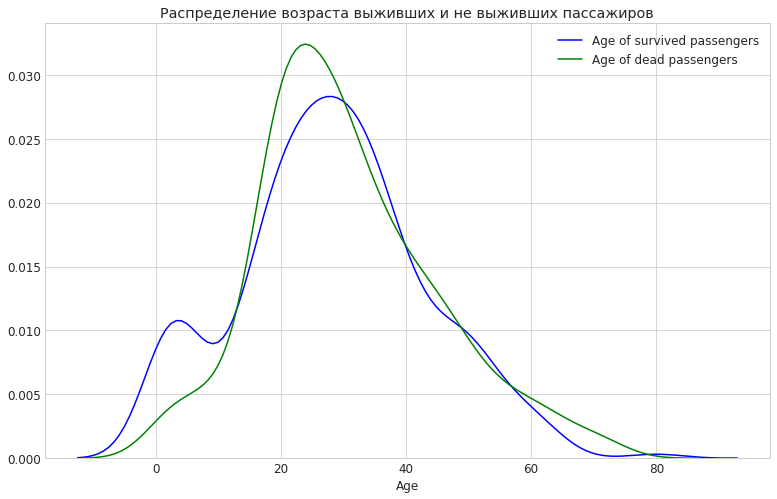

In [93]:
sns.distplot(df[df['Survived']==1]['Age'].dropna(),color ='blue', label = 'Age of survived passengers',hist=False)
sns.distplot(df[df['Survived']!=1]['Age'].dropna(),color ='green', label = 'Age of dead passengers',hist=False)
plt.legend()
plt.title("Распределение возраста выживших и не выживших пассажиров")
plt.show()

###### Графики почти совпадают друг с другом. Видно, что наибольшая выживаемость была среди людей 20-30 лет. Также можно заметить, что среди выживших присутствует незаконормерное относительно большое число выживших детей в возрасте до 10-15 лет. Это обусловлено тем фактом, что на корабле, в первую очередь старались спасать маленьких детей, а затем взрослых пассажиров 

#### 9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 

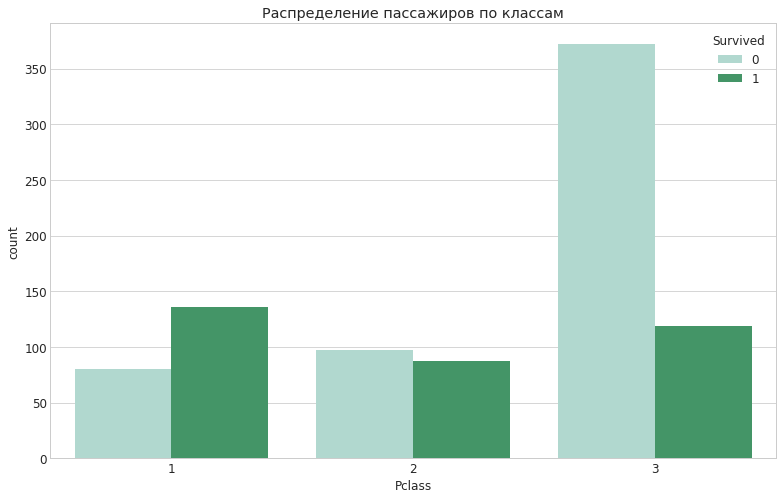

In [82]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='BuGn')
plt.title("Распределение пассажиров по классам")
plt.show()

##### Больше всего невыживших пассажиров находилось на корабле в каютах 3-го класса. Их спасали в последнюю очередь, в следствие чего именно им не хватило спасательных шлюпок

#### 10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

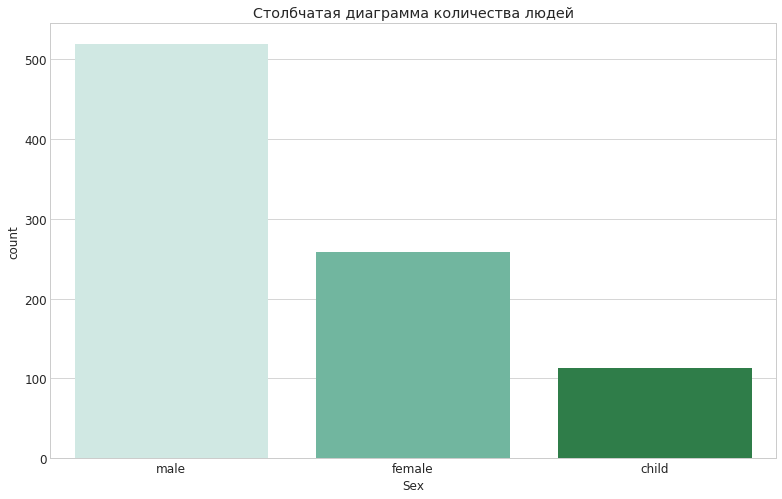

In [81]:
child_df=df
child_df.loc[child_df['Age']<18,'Sex']='child'
sns.countplot(x='Sex', data=df, palette='BuGn')
plt.title("Столбчатая диаграмма количества людей")
plt.show()